# Cleaning

In [3]:
import os
import pandas as pd

df= pd.read_csv('Heart copy.csv')

In [4]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
# Checking column names and data types
print(df.dtypes)

# Getting the summary statistics of the dataset (numerical features)
summary_stats = df.describe()

# Counting unique values in each column (categorical features)
unique_counts = df.nunique()

# Displaying the first few rows of the dataset to review
print(df.head())

# Output the summary statistics and unique value counts
summary_stats, unique_counts

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

(       PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
 count       434205.000000     436065.000000  439679.000000   416480.000000   
 mean             4.347919          4.382649       7.022983        1.702691   
 std              8.688912          8.387475       1.502425        0.107177   
 min              0.000000          0.000000       1.000000        0.910000   
 25%              0.000000          0.000000       6.000000        1.630000   
 50%              0.000000          0.000000       7.000000        1.700000   
 75%              3.000000          5.000000       8.000000        1.780000   
 max             30.000000         30.000000      24.000000        2.410000   
 
        WeightInKilograms            BMI  
 count      403054.000000  396326.000000  
 mean           83.074470      28.529842  
 std            21.448173       6.554889  
 min            22.680000      12.020000  
 25%            68.040000      24.130000  
 50%            80.740000    

In [6]:
# Checking for missing values
missing_values = df.isnull().sum()

# Displaying columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_columns)

# Separating numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Filling missing values for numerical columns with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# For categorical columns, we can fill missing values with the most frequent value (mode)
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check again for missing values
print("Remaining missing values after filling:\n", df.isnull().sum())

Columns with missing values:
 GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategory        14057
AgeCategory              

In [7]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Removing duplicates
df.drop_duplicates(inplace=True)

Number of duplicate rows: 366


In [8]:
numerical_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
categorical_columns = ['State', 'Sex', 'GeneralHealth', 'PhysicalActivities', 'HadHeartAttack']


# Fill missing values with the median and check if values are within a reasonable range
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)  # Fill missing values with the median
    
    # Ensure height is within realistic human range
    if col == 'HeightInMeters':
        df = df[(df[col] >= 1.2) & (df[col] <= 2.5)]  # Filtering heights to be between 1.2 and 2.5 meters

# Handle Categorical Columns
for col in categorical_columns:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)  # Fill missing values with the most frequent value (mode)
    
    # Standardizing values 
    if col == 'State':
        df[col] = df[col].str.title()  # Capitalize the first letter of each state
    
    if col == 'Sex':
        df[col] = df[col].replace({'M': 'Male', 'F': 'Female'})  # Replace abbreviations with full values
    
    if col == 'GeneralHealth':
        # Clean general health column, ensuring consistent capitalization
        df[col] = df[col].str.capitalize()

# Drop Irrelevant or Unnecessary Columns
columns_to_drop = ['RemovedTeeth']
df.drop(columns=columns_to_drop, inplace=True)

# Creating a BMI category based on standard BMI thresholds
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


# Convert categorical variables into dummy/one-hot encoding for modeling purposes
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.head()

,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,...,State_West Virginia,State_Wisconsin,State_Wyoming,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,PhysicalActivities_Yes,HadHeartAttack_Yes
0,0.0,0.0,Within past year (anytime less than 12 months ...,8.0,No,No,No,No,No,No,...,False,False,False,False,False,False,False,True,False,False
1,0.0,0.0,Within past year (anytime less than 12 months ...,6.0,No,No,No,Yes,No,No,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3.0,Within past year (anytime less than 12 months ...,5.0,No,No,No,Yes,No,No,...,False,False,False,False,False,False,False,True,True,False
3,0.0,0.0,Within past year (anytime less than 12 months ...,7.0,No,No,Yes,No,No,No,...,False,False,False,False,False,False,False,False,True,False
4,2.0,0.0,Within past year (anytime less than 12 months ...,9.0,No,No,No,No,No,No,...,False,False,False,False,True,False,False,False,True,False


In [9]:
# Check again for any missing values or duplicates after cleaning
print("Remaining missing values:\n", df.isnull().sum())
print("Remaining duplicates:", df.duplicated().sum())

Remaining missing values:
 State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI         

# EDA

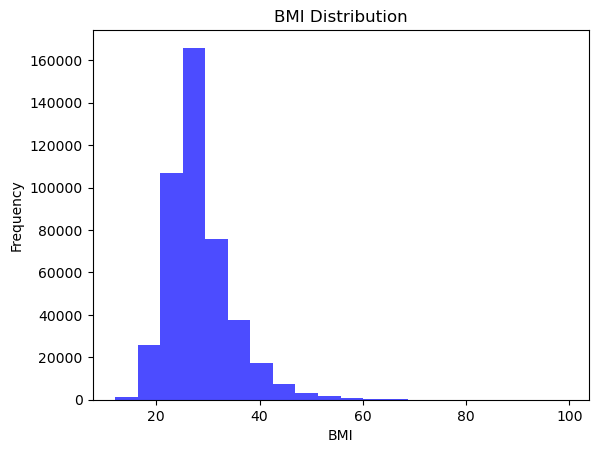

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of BMI
plt.hist(df['BMI'], bins=20, color='blue', alpha=0.7)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

The histogram reveals that most individuals in the dataset have a BMI between 20 and 35, with the highest frequency around 25-30. This suggests that a large proportion of individuals fall within the normal to overweight range according to standard BMI categories.
There are some individuals with BMI values above 50, which may represent outliers. Such high BMI values typically indicate severe obesity, which is a known risk factor for heart disease.
The distribution appears slightly right-skewed, meaning there are more individuals with higher BMI values than very low ones. This skewness might be relevant when considering transformations or feature engineering techniques.

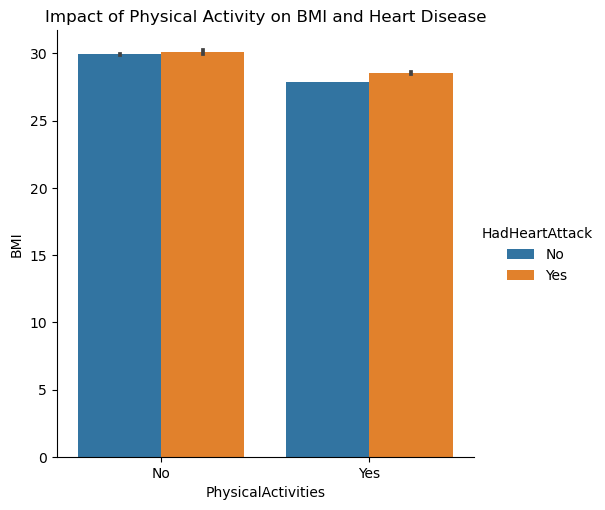

In [11]:
# Relationship between Physical Activity and Heart Disease
sns.catplot(x='PhysicalActivities', y='BMI', hue='HadHeartAttack', kind='bar', data=df)
plt.title('Impact of Physical Activity on BMI and Heart Disease')
plt.show()

Both physically active and inactive groups show similar BMI averages, suggesting that the mean BMI does not vary significantly with physical activity status alone. This could mean that BMI might not be highly dependent on whether individuals are engaging in physical activities within this dataset. Within each physical activity group, individuals who have had a heart attack (shown in orange) appear to have similar BMI values to those who haven’t had a heart attack (shown in blue). This suggests that BMI, on its own, may not be a strong predictor of heart disease within either the physically active or inactive groups. This plot provides insight into the combined influence of BMI and physical activity on heart disease, showing that neither physical activity alone nor BMI alone may be sufficient as strong predictors of heart disease. This points toward the need to consider a more complex interplay of multiple factors (like sleep, mental health, and general health status) in predicting heart disease.


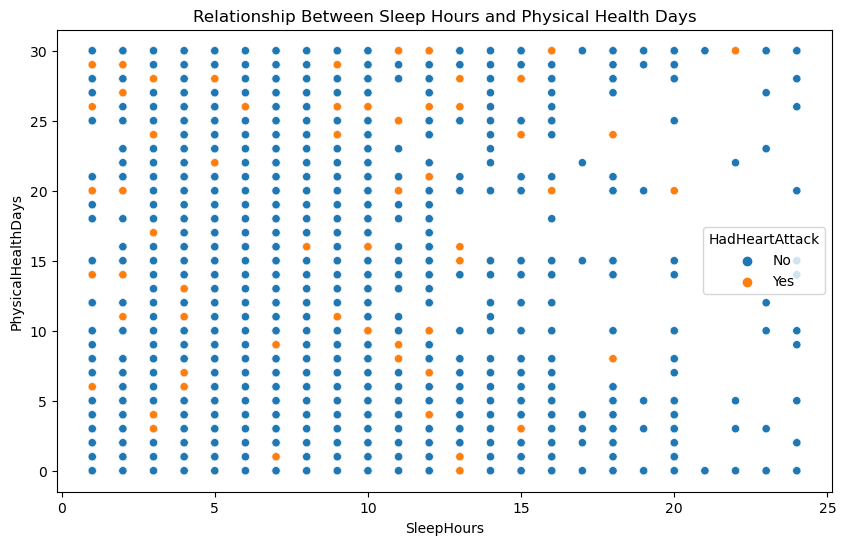

In [12]:
# Scatterplot for SleepHours and Physical Health Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SleepHours', y='PhysicalHealthDays', hue='HadHeartAttack', data=df)
plt.title('Relationship Between Sleep Hours and Physical Health Days')
plt.show()

This plot highlights that sleep hours and physical health days alone may not be sufficient predictors of heart disease. The spread of heart attack cases across different levels of these variables suggests that additional health or lifestyle factors should be considered in a predictive model. The clustering of heart attack cases in certain sleep and health day ranges (e.g., low sleep and high physical health days) could motivate feature engineering.

# EDA Conclusion

In my exploratory analysis of the dataset, I discovered several important insights into the factors that may contribute to heart disease. These findings highlight the complexity of accurately predicting heart disease risk and the need for a multifactorial approach. For instance, while BMI is generally associated with health risks, my analysis shows a wide range of BMI values with only limited differentiation between those with and without heart disease. This suggests that although BMI might play a role in heart disease risk, it likely needs to be combined with other variables to improve predictive accuracy. Similarly, when examining physical activity levels and BMI, I didn’t find significant variations in heart disease risk within each physical activity group. This indicates that physical activity, at least as captured in this dataset, may not be a strong standalone predictor of heart disease, though it could still provide value when considered alongside other lifestyle factors.

Additionally, I analyzed the relationship between sleep hours and physical health days, which revealed a potential cluster of heart disease cases among individuals with fewer sleep hours and higher physical health days. This finding suggests that poor physical health combined with inadequate sleep could indicate higher risk; however, heart disease cases are spread across different levels of sleep and physical health days. This reinforces my understanding that heart disease risk is likely influenced by multiple interacting factors, rather than by any single variable alone.

The overall spread of heart disease cases across various levels of BMI, physical activity, and sleep hours emphasizes the importance of building a multivariate model that considers a combination of health and lifestyle factors to better capture heart disease risk. The insights gained from this exploratory analysis will guide me in selecting, transforming, and interacting variables for the modeling phase, helping me build a predictive model that accurately identifies individuals at risk. I believe this holistic approach will support timely interventions and improve healthcare outcomes by providing a deeper understanding of the complex factors that contribute to heart disease.

# Preprocessing and Training Data Development

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Create dummy variables for categorical features
df = pd.get_dummies(df, drop_first=True)

# Standardize the magnitude of numeric features using a scaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply scaler to the numeric columns only
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X = df.drop('HighRiskLastYear_Yes', axis=1)
y = df['HighRiskLastYear_Yes']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (311243, 121)
X_test shape: (133390, 121)
y_train shape: (311243,)
y_test shape: (133390,)
